In [497]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [315]:
df = pd.read_csv("titanik.csv")

In [316]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [317]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [318]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Değişkenlerin Tanımları

1. PassengerId: Her bir yolcunun eşsiz numarası
2. Survived: Yolcunun hayatta kalması (1) veya hayatta kalmaması (0)
3. Pclass: Yolcunun yolculuk ettiği sınıf
4.  Name: Yolcunun ismi
5. Gender: Yolcunun cinsiyeti
6. Age: Yolcunun yaşı
7. SibSp: Yolcunun kardeş ve eş sayısı
8. Parch: Yolcunun ebeveyn ve çocuk sayısı
9. Ticket: Bilet numarası
10. Fare: Bilet ücreti
11. Cabin: Kabin kategorisi
12. Embarked: Yolcunun gemiye hangi limanda bindiği (C = Cherbourg, Q = Queenstown, S = Southampton)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2 adet): Bilet ücreti ve yas
* int64(5 adet): Yolcunun yolculuk ettiği sınıf, kardeş ve eş sayısı, ebeveyn ve çocuk sayısı , her bir yolcunun eşsiz numarası ve yolcunun hayatta kalması ve ya hayatta kalmaması
* object(5 adet): Kabin kategorisi, yolcunun gemiye hangi limanda bindiği, bilet numarası, isim ve cinsiyet
* Şimdi burada bulunan değişken isimlerini değiştirerek Türkçe isimler verelim.

In [320]:
df.rename(columns = {"PassengerId" : "ID",
                     "Survived" : "Hayatta_Kalma",
                     "Pclass" : "Sinif",
                     "Name" : "Isim",
                     "Gender" : "Cinsiyet",
                     "Age" : "Yas",
                     "SibSp" : "Kardes_Es",
                     "Parch" : "Ebeveyn_Cocuk",
                     "Ticket" : "Bilet",
                     "Fare" : "Ucret",
                     "Cabin" : "Kabin",
                     "Embarked" : "Liman"}, inplace = True)

df.head(2)

,ID,Hayatta_Kalma,Sinif,Isim,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Tek Değişken Analizi
* Kategorik Değişken: hayatta_kalma, cinsiyet, sinif, liman, kabin, isim, bilet, kardes_es ve ebeveyn_cocuk
* Sayısal Değişken: ucret, yas ve id

### Kategorik Değişken

In [321]:
def CubukGrafigi(degisken):
    ozellik = df[degisken]
    ozellik_degeri = ozellik.value_counts()

    plt.figure(figsize = (9,3))
    plt.bar(ozellik_degeri.index, ozellik_degeri)
    plt.xticks(ozellik_degeri.index, ozellik_degeri.index.values)
    plt.ylabel("Frekans")
    plt.title(degisken)
    plt.show()
    print(f"{degisken}: \n {ozellik_degeri}")

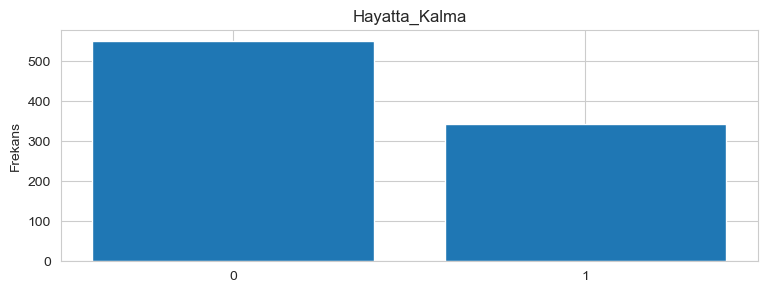

Hayatta_Kalma: 
 Hayatta_Kalma
0    549
1    342
Name: count, dtype: int64


KeyError: 'Cinsiyet'

In [523]:
# fonksiyonumuzu birkaç farklı kategorik değişken için çağıralım
# sonuçları yorumlayalım
kategori1 = ["Hayatta_Kalma", "Cinsiyet", "Sinif", "Liman", "Kardes_Es", "Ebeveyn_Cocuk"]
for c in kategori1:
    CubukGrafigi(c)

In [323]:
kategori2 = ["Kabin", "Isim", "Liman"]
for c in kategori2:
    print(f"{df[c].value_counts()} \n")

Kabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 

Isim
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Liman
S    644
C    168
Q     77
Name: count, dtype: int64 



### Sayısal Değişken

In [526]:
# sayısal değişkenlere ilişkin histogram çizdirme fonksiyonu
def  histogramGrafik(degisken):
    plt.figure(figsize = (9,3))
    plt.hist(df[degisken],bins=50)
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title(f"{degisken} Histogramı")
    plt.show()    

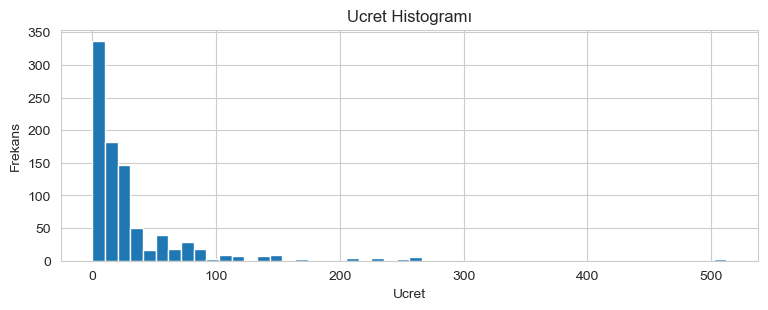

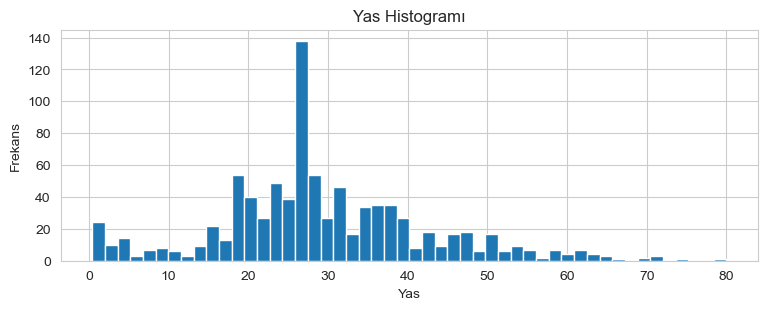

KeyError: 'ID'

<Figure size 900x300 with 0 Axes>

In [528]:
# sayısal değişkenlerin histogramlarını çizdir
sayisal_degiskenler = ["Ucret", "Yas", "ID"]
for i in sayisal_degiskenler:
    histogramGrafik(i)

Temel Veri Analizi
* Bu bölümde hayatta kalma ile farklı değişkenler arasındaki ilişkiyi inceleyelim.
* sinif - hayatta_kalma
* cinsiyet - hayatta_kalma
* kardes_es - hayatta_kalma
* ebeveyn_cocuk - hayatta_kalma
* Uyarı: tabloda çıkan değerler olasılık değildir. Büyüklük olarak karşılaştırılması gerekir.

In [531]:
# seyahat edilen sınıf - hayatta kalma ilişkisi
df[["Sinif","Hayatta_Kalma"]].groupby("Sinif", as_index = False).mean().sort_values(by = "Hayatta_Kalma", ascending = False)

KeyError: "['Sinif'] not in index"

* Birinci sınıfta yolculuk eden yolcuların ikinci ve üçüncü sınıfta yolculuk eden yolculara göre hayatta kalmalarının daha yüksek olduğu görülüyor.
* sinif değişkeni hayatta kalma - hayatta kalmama sınıflandırması yaparken kullanabilecemiz önemli bir değişken olabilir.

In [537]:
# cinsiyet - hayatta kalma ilişkisi
df[["Cinsiyet","Hayatta_Kalma"]].groupby("Cinsiyet", as_index = False).mean().sort_values(by = "Hayatta_Kalma", ascending = False)

KeyError: "['Cinsiyet'] not in index"

* Kadınların hayatta kalmalarının erkeklere göre çok daha fazla olduğunu görebiliriz.
* Cinsiyet değişkeni hayatta kalma - hayatta kalmama sınıflandırması yaparken kullanabilecemiz önemli bir değişken olabilir.

In [541]:
# kardeş ve eş sayısı ile hayatta kalma ilişkisi
df[["Kardes_Es","Hayatta_Kalma"]].groupby("Kardes_Es", as_index = False).mean().sort_values(by = "Hayatta_Kalma", ascending = False)

,Kardes_Es,Hayatta_Kalma
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* Kardes ve eş sayısı 1-2-0 olanların 3-4-5-8 olanlara göre hayatta kalmada daha avantajlı oldukları çıkarılabilir.

In [546]:
# ebeveyn ve çocuk sayısı ile hayatta kalma ilişkisi
df[["Ebeveyn_Cocuk","Hayatta_Kalma"]].groupby("Ebeveyn_Cocuk", as_index = False).mean().sort_values(by = "Hayatta_Kalma", ascending = False)

,Ebeveyn_Cocuk,Hayatta_Kalma
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


* Ebeveyn ve çocuk sayısı 3-1-2-0 olanların 5-4-6 olanlara göre hayatta kalmada daha avantajlı oldukları çıkarılabilir.

### Aykırı Değer Tespiti
* Aykırı değerler, verinin eğitilmesi sürecinde modelin yanlış öğrenmesine neden olacak değerlerdir. Bu nedenle veriden çıkarılmaları gerekir.

In [330]:
# aykırı değer fonksiyonu
def aykiriDegerTespiti(df,ozellik):
    outlier_indices = []
    
    for c in ozellik:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # aykırı değer adımı
        outlier_step = IQR * 1.5
        # aykırı değerleri ve indekslerini tespit et.
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [331]:
df.loc[aykiriDegerTespiti(df,["Yas","Kardes_Es","Ebeveyn_Cocuk","Ucret"])]

,ID,Hayatta_Kalma,Sinif,Isim,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


### Kayıp Veri
* Kayıp veri hem eğitim hem de test veri setinde olabilir.
* Kayıp verinin doldurulması işlemini veri setlerini birleştirerek yapmalıyız çünkü kayıp verinin doldurulmasında istatistiksel yöntemleri kullanacağımız için alt kümeler yerine ana kütleyi kullanmak daha uygun olacaktır.
* Bu bölümde aşağıdaki işlemleri gerçekleştireceğiz.
    1. Kayıp Verinin Bulunması
    2. Kayıp Verinin Doldurulması

In [332]:
# kayıp veriyi içeren sütunlar
df.columns[df.isnull().any()]

Index(['Yas', 'Kabin', 'Liman'], dtype='object')

In [333]:
df.isnull().sum()

ID                 0
Hayatta_Kalma      0
Sinif              0
Isim               0
Cinsiyet           0
Yas              177
Kardes_Es          0
Ebeveyn_Cocuk      0
Bilet              0
Ucret              0
Kabin            687
Liman              2
dtype: int64

* hayatta kalma değişkenin boş olması test veri setinden kaynaklı. Çünkü adı üzerinde test veri seti olduğu için test veri setinin içerisinde hayatta_kalma diye bir değişken bulunmuyor. Biz sınıflandırma yaparak test veri setinin içerisindeki örneklerin hayatta kalıp kalamadıklarını bulacağız.
* yas, kabin, liman ve ücret değişkenlerini sırayla ele alalım.

### Kayıp Verinin Doldurulması
* Liman 2 adet kayıp veriye sahip.

In [335]:
df[df["Liman"].isnull()]

,ID,Hayatta_Kalma,Sinif,Isim,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


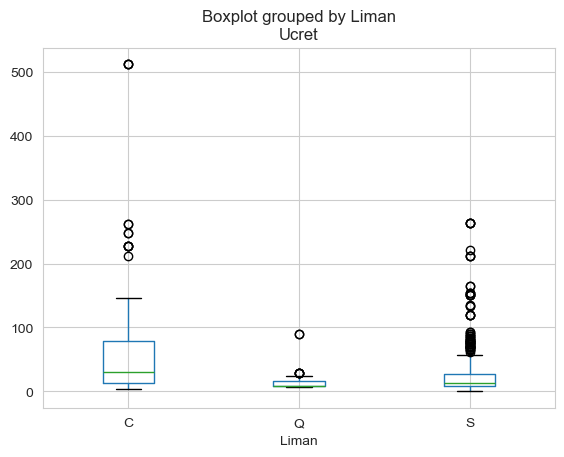

In [336]:
df.boxplot(column = "Ucret", by = "Liman")
plt.show()

* Liman değişkeni kayıp olan iki örneğin de ödenen ücreti 80.
* Limanlara göre ödenen ücretin kutu grafiğine baktığımız zaman, ödenen ücret olan 80'nin Q ve S limanları için aykırı değer olduğu görülüyor.
* Bu nedenle, liman değişkeni kayıp olan iki örneğin liman değerini "C" olarak doldurabiliriz.

In [338]:
# buraya kod yazacağız
df["Liman"] = df["Liman"].fillna("C") # boş liman verilerini C ile doldur
df[df["Liman"].isnull()] # tekrardan boş eleman var mı diye kontrol edelim

,ID,Hayatta_Kalma,Sinif,Isim,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman


In [339]:
df[df["Ucret"].isnull()]

,ID,Hayatta_Kalma,Sinif,Isim,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman


* Yaş değişkeninde bulunan kayıp verileri, veriyi görselleştirme yöntemleri ile derinlemesine inceledikten sonra dolduracağız.
* Kabin değişkenini sınıflandırmada kullanmayacağımız için kabin değişkeninde bulunan kayıp verilerin doldurulmasına gerek yoktur.

## Görselleştirme

### Kardeş/Eş, Ebeveyn/Çocuk, Yaş, Ücret, Hayatta Kalma Arasındaki Korelasyon

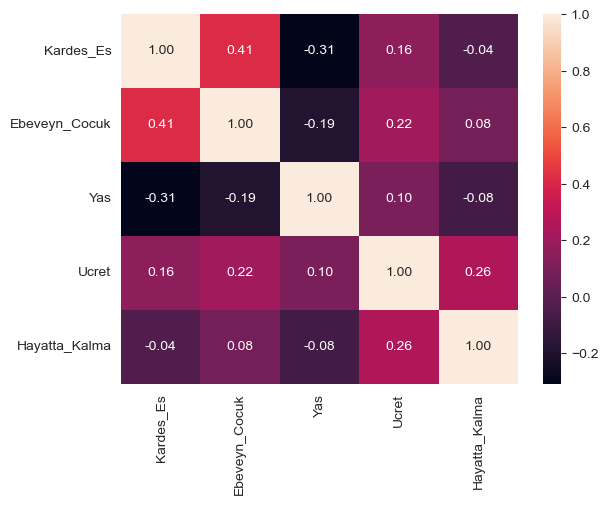

In [343]:
list1 = ["Kardes_Es", "Ebeveyn_Cocuk", "Yas", "Ucret", "Hayatta_Kalma"]
sns.heatmap(df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

* Hayatta kalma ile en çok ilişkisi olan 0.26'lık oran ile bilet ücretidir.

### Kardeş/Eş, Hayatta Kalma

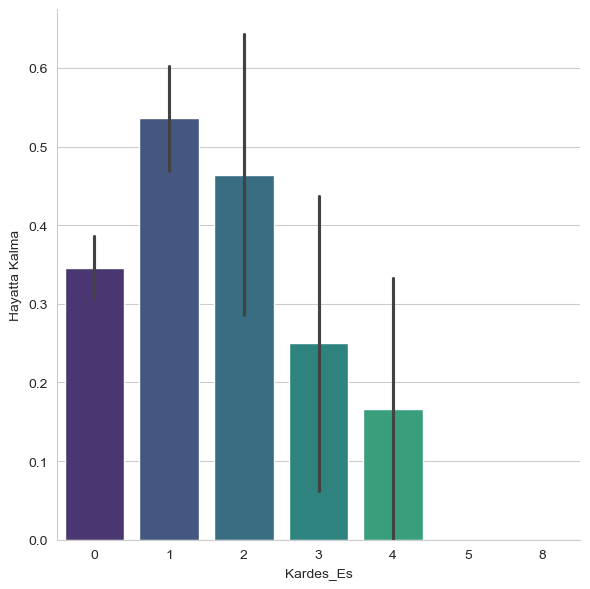

In [346]:
g = sns.catplot(x="Kardes_Es", y="Hayatta_Kalma", data=df, kind="bar", height=6, palette = "viridis")
g.set_ylabels("Hayatta Kalma")
plt.show()

* Çok sayıda kardeş ve eşe sahip olan yolcuların hayatta kalmaları daha az.
* 0-1-2 sayıda kardeş ve eşe sahip olan yolcuların hayatta kalmaları daha yüksek.
* Bu nedenle kardes_es değişkeni kullanarak yeni bir özellik çıkarabiliriz.

### Ebeveyn/Çocuk, Hayatta Kalma

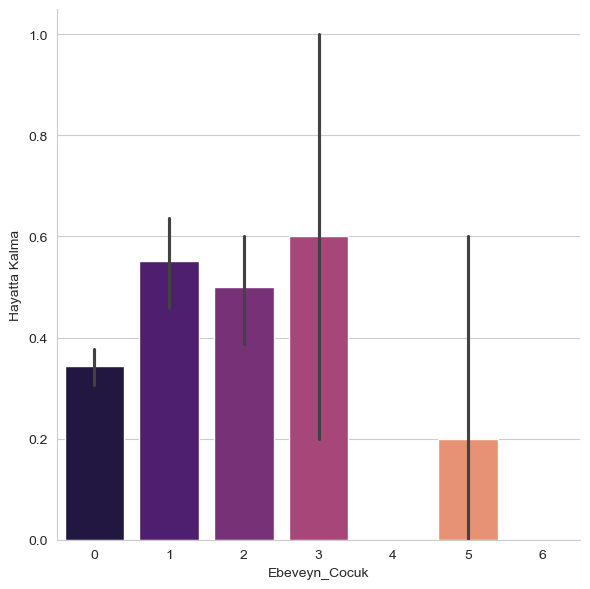

In [349]:
g = sns.catplot(x="Ebeveyn_Cocuk", y="Hayatta_Kalma", kind="bar", data=df, height=6, palette="magma")
g.set_ylabels("Hayatta Kalma")
plt.show()

* 3 ve daha az ebeveyn ve çocuğa sahip yolcuların hayatta kalmaları daha yüksek.
* Kardeş/eş ve ebeveyn/çocuk değişkenlerinden yola çıkarak, bu iki değişken aile değişkeni altında birleştirilip yeni bir özellik çıkarılabilir.

### Sınıf, Hayatta Kalma

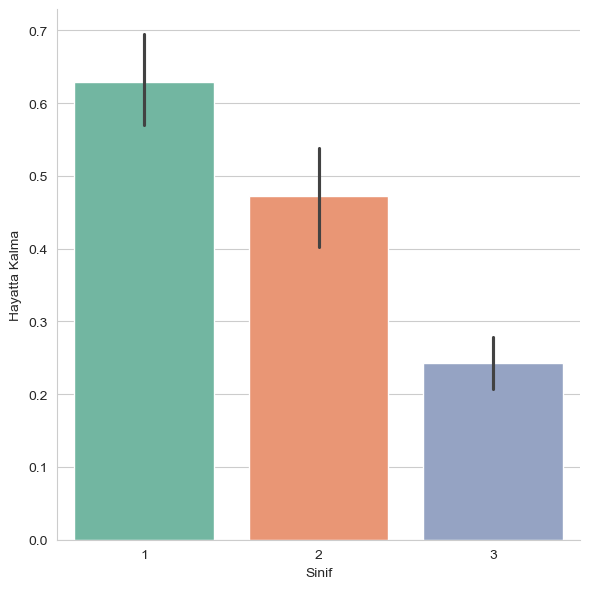

In [352]:
g = sns.catplot(x = "Sinif", y = "Hayatta_Kalma", data = df, kind = "bar", height = 6, palette = "Set2")
g.set_ylabels("Hayatta Kalma")
plt.show()

* Yolcuların sınıfları ile hayatta kalma ihtimalleri arasında pozitif bir ilişki olduğu görülmektedir.

### Yaş, Hayatta Kalma

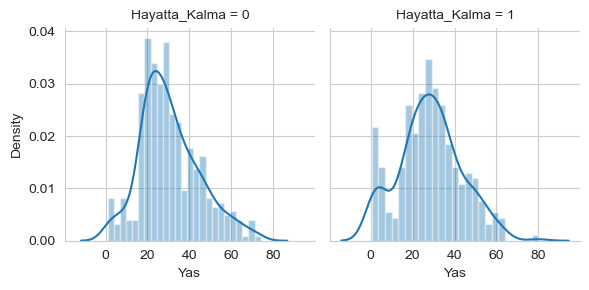

In [355]:
g = sns.FacetGrid(df, col = "Hayatta_Kalma")
g.map(sns.distplot, "Yas", bins = 25)
plt.show()

* 10 yaşından küçük yolcuların hayatta kalmaları yüksek
* En yaşlı yolcular (80 yaş) hayatta kaldılar
* 20 yaş civarında ki yolcuların çoğu hayatta kalamadı
* Yolcuların çoğu 15-35 yaş aralığında
* Yaş değişkenini makine öğrenmesi modelimizi eğitirken kullanabiliriz
* Ayrıca yaş dağılımını, yaş değişkeni içerisinde bulunan kayıp verileri doldurmak için kullanacağız.

### Sınıf, Hayatta Kalma, Yaş

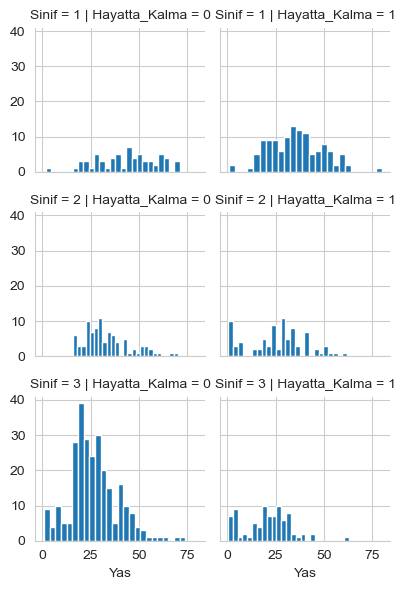

In [358]:
g = sns.FacetGrid(df, col = "Hayatta_Kalma", row = "Sinif", height = 2)
g.map(plt.hist, "Yas", bins = 25)
g.add_legend()
plt.show()

* Bu grafik sayesinde üçüncü sınıfta bulunan yolcuların genç nüfusun büyük bir kısmını oluşturduğunu anlıyoruz.
* Sınıf farkının hayatta kalmaya etkisini bir kere daha görüyoruz.

### Liman, Cinsiyet, Sınıf, Hayatta Kalma

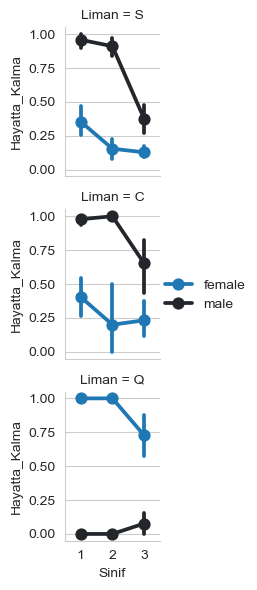

In [361]:
g = sns.FacetGrid(df, row = "Liman", height = 2)
g.map(sns.pointplot, "Sinif", "Hayatta_Kalma", "Cinsiyet")
g.add_legend()
plt.show()

* Kadın yolcuların hayatta kalmaları erkeklere göre çok daha yüksektir.
* C limanından binen yolcular arasında erkelerin hayatta kalmaları kadınlara göre daha fazladır.

### Liman, Cinsiyet, Ücret, Hayatta Kalma

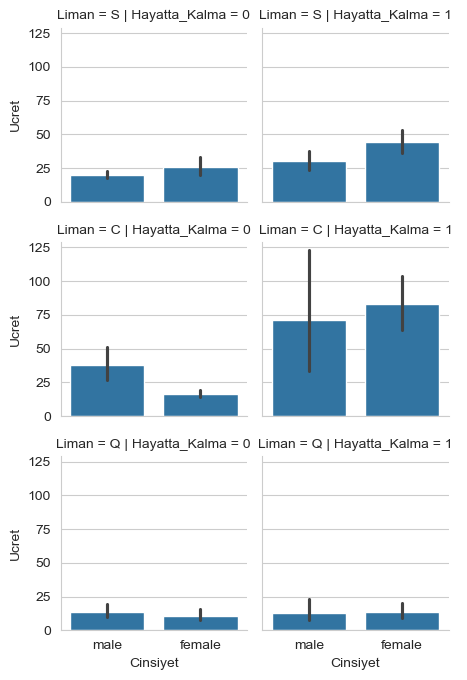

In [364]:
g = sns.FacetGrid(df, row = "Liman", col = "Hayatta_Kalma", height = 2.3)
g.map(sns.barplot, "Cinsiyet", "Ucret")
g.add_legend()
plt.show()

* Daha yüksek ücret ödeyen yolcuların hayatta kalması daha fazladır.
* Ücret, eğitim için kategorik bir değişken olarak kullanılabilir.

### Kayıp Veri Doldurulması: Yaş Değişkeni

* Yaş değişkeninde bulunan kayıp veriyi, yaş değişkeninin dağılımına göre dolduracağız.

In [368]:
# yaş değişkenindeki kayıp veriyi inceleyelim
df[df["Yas"].isnull()]

,ID,Hayatta_Kalma,Sinif,Isim,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


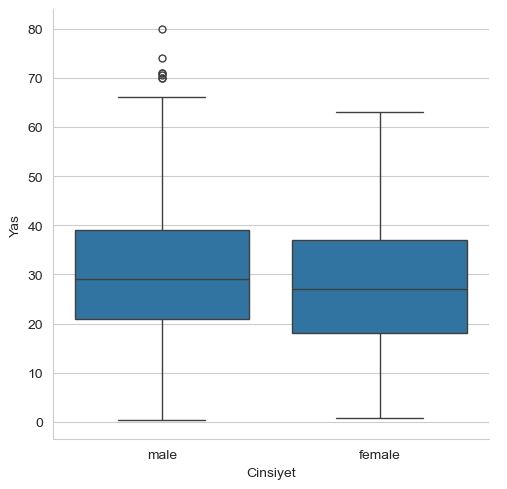

In [369]:
sns.catplot(x = "Cinsiyet", y = "Yas", data = df, kind = "box")
plt.show()

* Cinsiyet, yaş tahmini için bilgilendirici değil, yaş dağılımı aynı görünüyor.

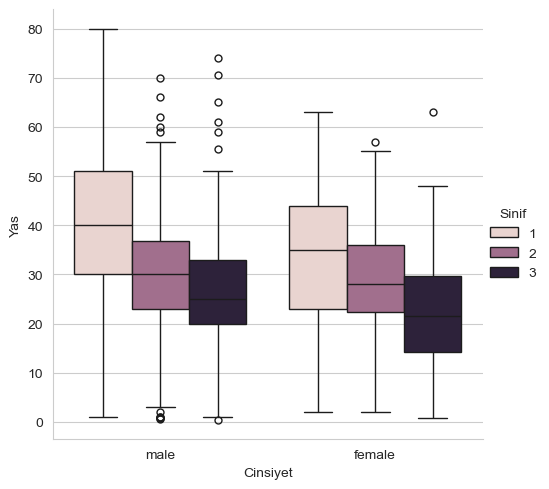

In [371]:
sns.catplot(x = "Cinsiyet", y = "Yas", hue = "Sinif", data = df, kind = "box")
plt.show()

* 1.sınıf yolcular 2. sınıftan, 2. sınıf yolcular 3. sınıftan yaş olarak büyüktür.

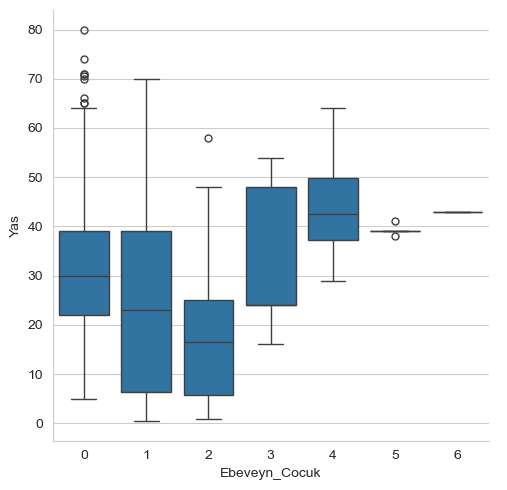

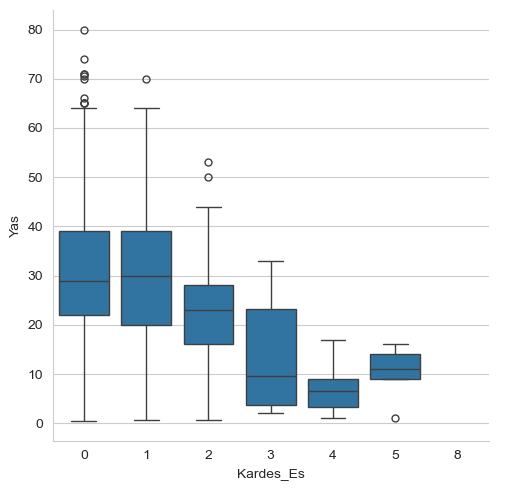

In [373]:
sns.catplot(x = "Ebeveyn_Cocuk", y = "Yas", data = df, kind = "box")
sns.catplot(x = "Kardes_Es", y = "Yas", data = df, kind = "box")
plt.show()

* Yaş değişkeni, ebeveyn/çocuk ve kardeş/eş değişkenlerine göre farklılık göstermektedir.

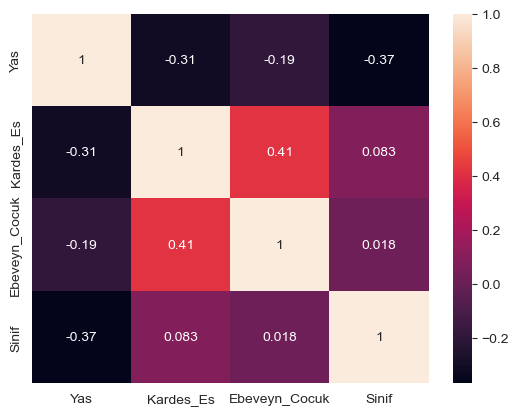

In [375]:
sns.heatmap(df[["Yas", "Kardes_Es", "Ebeveyn_Cocuk", "Sinif"]].corr(), annot = True)
plt.show()

In [376]:
index_nan_age = list(df["Yas"][df["Yas"].isnull()].index)
for i in index_nan_age:
    age_pred = df["Yas"][((df["Kardes_Es"] == df.iloc[i]["Kardes_Es"]) &(df["Ebeveyn_Cocuk"] == df.iloc[i]["Ebeveyn_Cocuk"])& (df["Sinif"] == df.iloc[i]["Sinif"]))].median()
    age_med = df["Yas"].median()
    if not np.isnan(age_pred):
        df["Yas"].iloc[i] = age_pred
    else:
        df["Yas"].iloc[i] = age_med 

In [377]:
df[df["Yas"].isnull()]

,ID,Hayatta_Kalma,Sinif,Isim,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman


## Özellik Mühendisliği

* Özellik mühendisliği, veri madenciliği teknikleri yoluyla ham verilerden özellikleri çıkarmak için alan bilgisini kullanma sürecidir.
* Bu özellikler, makine öğrenimi algoritmalarının performansını iyileştirmek için kullanılabilir.
* Özellik mühendisliği, uygulamalı makine öğreniminin kendisi olarak düşünülebilir.

### İsim, Ünvan

* Yolcuların hayatta kalıp kalmadığını anlama noktasında, yolcuların isimleri bize yardımcı olmayacaktır ama o zamanın şartlarından kaynaklı olarak yolcuların ünvanları sınıflandırma konusunda kullanabiliriz.

In [382]:
df["Isim"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Isim, dtype: object

In [383]:
name = df["Isim"]
df["Unvan"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
df["Unvan"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Unvan, dtype: object

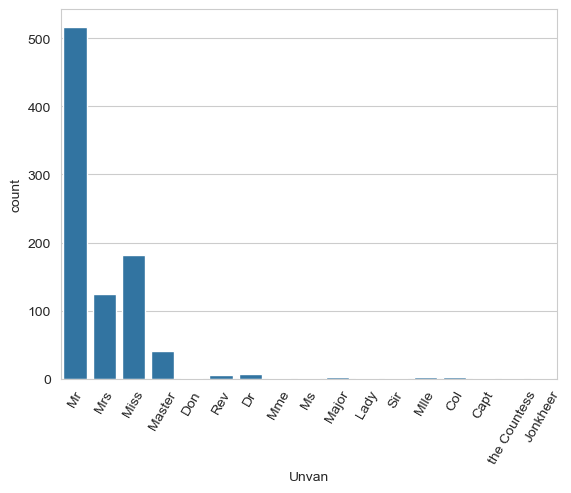

In [384]:
sns.countplot(x = "Unvan", data = df)
plt.xticks(rotation = 60)
plt.show()

In [385]:
# ünvanların bazıları çok nadir olduğu için, ünvanların hepsini kategorik hale getirelim
df["Unvan"] = df["Unvan"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
df["Unvan"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in df["Unvan"]]
df["Unvan"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Unvan, dtype: int64

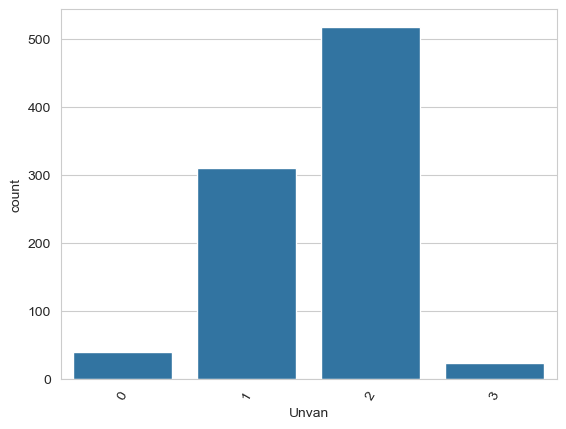

In [386]:
# kategorik hale getirmiş olduğumuz unvanları görselleştirelim
sns.countplot(x = "Unvan", data = df)
plt.xticks(rotation = 60)
plt.show()

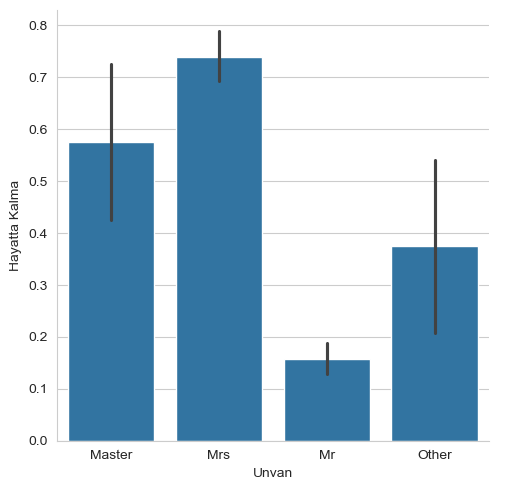

In [387]:
# unvanlar ve hayatta kalma arasındaki ilişkiye bakalım
g = sns.catplot(x = "Unvan", y = "Hayatta_Kalma", data = df, kind = "bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Hayatta Kalma")
plt.show()

In [388]:
# unvan için yeni bir sütun tanımladığımız için isimleri çıkartabiliriz
df.drop(labels = ["Isim"], axis = 1, inplace = True)
df.head(3)

,ID,Hayatta_Kalma,Sinif,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman,Unvan
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [389]:
# getdummies metodunu, unvan değişkeni içerisinde bulunan kategorik veriyi one-hot şeklinde temsil eder.
df = pd.get_dummies(df, columns = ["Unvan"])
df.head(3)

,ID,Hayatta_Kalma,Sinif,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman,Unvan_0,Unvan_1,Unvan_2,Unvan_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False


### Aile Boyutu

* Hayatta kalma ile kardes_es ve ebeveyn_cocuk değişkenlerinin ilişkisi olduğunu incelemiştik.
* Bu bölümde kardes_es ve ebeveyn_cocuk değişkenlerini birleştirip tek bir değişken elde edeceğiz.

In [392]:
df.head(3)

,ID,Hayatta_Kalma,Sinif,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman,Unvan_0,Unvan_1,Unvan_2,Unvan_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False


In [393]:
# yolcunun kendisi + yolcunun kardes_es sayı değeri + yolcunun ebeveyn_cocuk sayısı
df["aile_boyutu"] = df["Kardes_Es"] + df["Ebeveyn_Cocuk"] + 1
df.head(3)

,ID,Hayatta_Kalma,Sinif,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman,Unvan_0,Unvan_1,Unvan_2,Unvan_3,aile_boyutu
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1


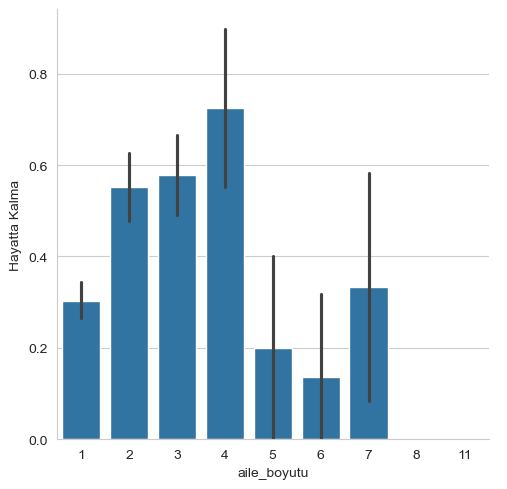

In [394]:
# aile boyutunu görselleştirelim
g = sns.catplot(x = "aile_boyutu", y = "Hayatta_Kalma", data = df, kind = "bar")
g.set_ylabels("Hayatta Kalma")
plt.show()

In [395]:
# aile boyutu değişkenini iki kategorili hale getirelim
# eğer aile boyutu < 5 ise 1 değeri verelim; aksi takdirde 0 değeri verelim
df["aile"] = [1 if i < 5 else 0 for i in df["aile_boyutu"]]
df.head(10)

,ID,Hayatta_Kalma,Sinif,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman,Unvan_0,Unvan_1,Unvan_2,Unvan_3,aile_boyutu,aile
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


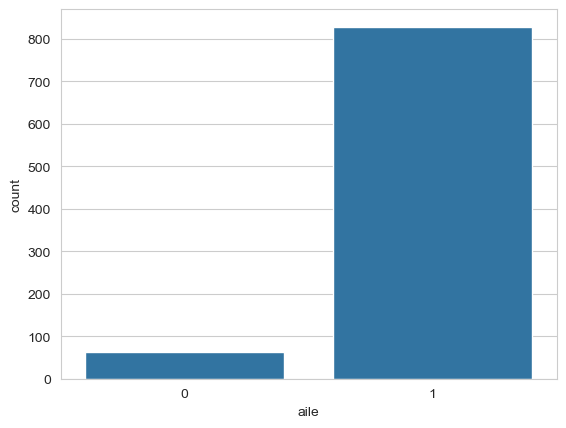

In [396]:
# aileyi görselleştirelim
sns.countplot(x = "aile", data = df)
plt.show()

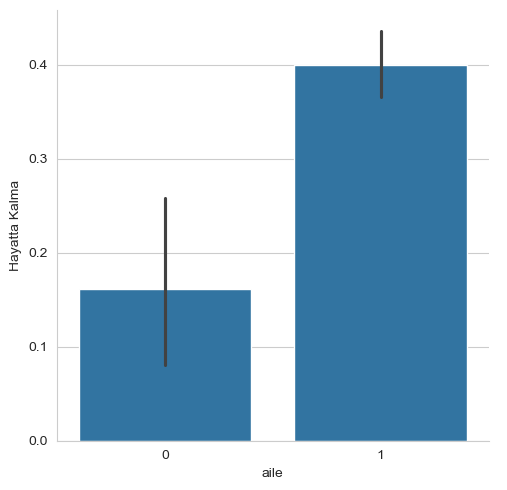

In [397]:
# aile değişkeni ve hayatta kalma arasındaki ilişkiye bakalım
g = sns.catplot(x = "aile", y = "Hayatta_Kalma", data = df, kind = "bar")
g.set_ylabels("Hayatta Kalma")
plt.show()

In [398]:
# aile değişkenini de one-hot hale getirelim
df = pd.get_dummies(df, columns = ["aile"])
df.head(3)

,ID,Hayatta_Kalma,Sinif,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Liman,Unvan_0,Unvan_1,Unvan_2,Unvan_3,aile_boyutu,aile_0,aile_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True


### Liman

In [400]:
df["Liman"].head(3)

0    S
1    C
2    S
Name: Liman, dtype: object

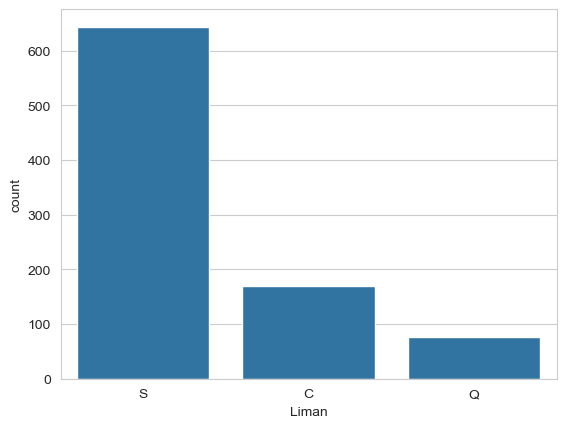

In [401]:
# limanları görselleştirelim
sns.countplot(x = "Liman", data = df)
plt.show()

In [402]:
# liman değişkenini de one-hot gösterime dönüştürelim
df = pd.get_dummies(df, columns = ["Liman"])
df.head(3)

,ID,Hayatta_Kalma,Sinif,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Unvan_0,Unvan_1,Unvan_2,Unvan_3,aile_boyutu,aile_0,aile_1,Liman_C,Liman_Q,Liman_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True


### Bilet

* Biletlerin başında yazan sayıları önemli örneğin bilet no: A/5 21171, burada A5 bizim için ayırt edici bir veri olacak.
* Bu nedenle bilet değişkeni içerisindeki veriyi düzenleyeceğiz.

In [405]:
df["Bilet"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Bilet, dtype: object

In [406]:
# A5 değerini nasıl elde ettiğimize ilişkin bir örnek
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [407]:
# tüm bilet numaraları için yukarıdakine benzer komutu işletelim
tickets = []
for i in list(df["Bilet"]):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")

df["Bilet"] = tickets

In [408]:
# biletlerin önemli bölümlerini elde edelim
df["Bilet"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Bilet, dtype: object

In [409]:
df.head(3)

,ID,Hayatta_Kalma,Sinif,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Bilet,Ucret,Kabin,Unvan_0,Unvan_1,Unvan_2,Unvan_3,aile_boyutu,aile_0,aile_1,Liman_C,Liman_Q,Liman_S
0,1,0,3,male,22.0,1,0,A5,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STONO2,7.9250,NaN,False,True,False,False,1,False,True,False,False,True


In [410]:
# bilet değişkenini de one-hot gösterime çevirelim
df = pd.get_dummies(df, columns = ["Bilet"], prefix = "T")
df.head(3)

,ID,Hayatta_Kalma,Sinif,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Ucret,Kabin,Unvan_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,False,True,False,False,False,False


### Sınıf

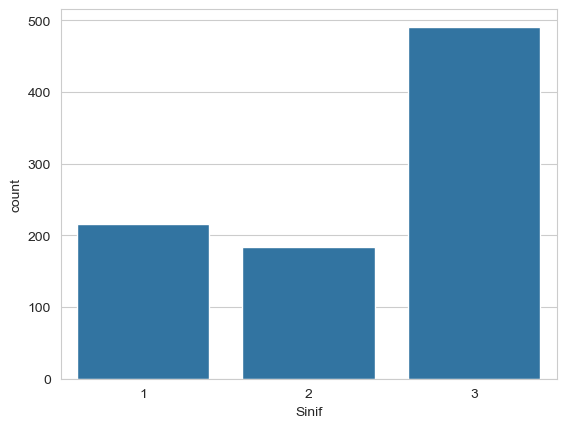

In [412]:
# sınıfları görselleştirelim
sns.countplot(x = "Sinif", data = df)
plt.show()

In [413]:
# sınıf değişkenini kategorik hale getirelim ve ardından one-hot gösterime geçirelim
# çünkü get_dummies fonksiyonu sadece kategorik veride çalışır
df["Sinif"] = df["Sinif"].astype("category")
df = pd.get_dummies(df, columns = ["Sinif"])
df.head(3)

,ID,Hayatta_Kalma,Cinsiyet,Yas,Kardes_Es,Ebeveyn_Cocuk,Ucret,Kabin,Unvan_0,Unvan_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Sinif_1,Sinif_2,Sinif_3
0,1,0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,False,True,...,False,False,True,False,False,False,False,False,False,True


### Cinsiyet

In [415]:
# cinsiyeti de one-hot gösterime çevirelim
df["Cinsiyet"] = df["Cinsiyet"].astype("category")
df = pd.get_dummies(df, columns=["Cinsiyet"])
df.head()

,ID,Hayatta_Kalma,Yas,Kardes_Es,Ebeveyn_Cocuk,Ucret,Kabin,Unvan_0,Unvan_1,Unvan_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Sinif_1,Sinif_2,Sinif_3,Cinsiyet_female,Cinsiyet_male
0,1,0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,26.0,0,0,7.9250,NaN,False,True,False,...,True,False,False,False,False,False,False,True,True,False
3,4,1,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


### Yolcu Numarası ve Kabin Değişkenlerinin Çıkarılması

In [417]:
# yolcu numarası ve kabin değişkenlerinin sınıflandırma açısından
# bir önemi olmadığını düşündüğümüzden, bunları çıkaralım
df.drop(labels = ["ID", "Kabin"], axis = 1, inplace = True)

In [418]:
# sonuç olarak, modelleme öncesi one-hot gösterime aldığımız
# hem de sınıflandırmada kullanacak olduğumuz değişkenleri görelim
df.columns

Index(['Hayatta_Kalma', 'Yas', 'Kardes_Es', 'Ebeveyn_Cocuk', 'Ucret',
       'Unvan_0', 'Unvan_1', 'Unvan_2', 'Unvan_3', 'aile_boyutu', 'aile_0',
       'aile_1', 'Liman_C', 'Liman_Q', 'Liman_S', 'T_A4', 'T_A5', 'T_AS',
       'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC',
       'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS',
       'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ',
       'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x',
       'Sinif_1', 'Sinif_2', 'Sinif_3', 'Cinsiyet_female', 'Cinsiyet_male'],
      dtype='object')

### Modelleme

* Bu bölümde verinin eğitim-test olarak bölünmesi, lojistik regresyon ile eğitilmesi, hiperparametre ayarlaması, ızgara arama, çapraz doğrulama ve topluluk modellemesi işlemlerini gerçekleştireceğiz.

### Eğitim - Test Bölünmesi

* Eğitim %67, test %33 olacak şekilde bölünme işlemini gerçekleştireceğiz.

In [492]:
X_egitim = df.drop(labels = "Hayatta_Kalma", axis = 1)
y_egitim = df["Hayatta_Kalma"]
X_egitim, X_test, y_egitim, y_test = train_test_split(X_egitim, y_egitim, test_size = 0.33, random_state = 42)
print("X eğitim: ", len(X_egitim))
print("X test: ", len(X_test))
print("Y eğitim: ", len(y_egitim))
print("Y test: ", len(y_test))

X eğitim:  596
X test:  295
Y eğitim:  596
Y test:  295


### Temel Lojistik Regresyon

In [499]:
logreg = LogisticRegression()
logreg.fit(X_egitim, y_egitim)
basarim_log_egitim = round(logreg.score(X_egitim, y_egitim)*100, 2)
basarim_log_test = round(logreg.score(X_test, y_test)*100,2)
print("Eğitim Doğruluğu: % {}".format(basarim_log_egitim))
print("Test Doğruluğu: % {}".format(basarim_log_test))

Eğitim Doğruluğu: % 82.89
Test Doğruluğu: % 83.73


### Hiperparametre Ayarı - Izgara Arama - Çapraz Doğrulama

* Bu bölümde 5 farklı makine öğrenmesi sınıflandırıcısını karşılaştıracağız ve katmanlı çapraz doğrulama ile her birinin ortalama doğruluğunu değerlendireceğiz.

1. Karar Ağacı
2. Destek Vektör Makinesi
3. Rastgele Orman
4. K-En Yakın Komşu
5. Lojistik Regresyon

In [505]:
random_state = 42
# tüm sınıflandırıcıları bir listede toplayalım
siniflandiricilar = [DecisionTreeClassifier(random_state = random_state),
                     SVC(random_state = random_state),
                     RandomForestClassifier(random_state = random_state),
                     LogisticRegression(random_state = random_state),
                     KNeighborsClassifier()]

# Karar Ağacı Algoritması Hiperparametreleri
dt_param_grid = {"min_samples_split" : range(10,500,20),
                 "max_depth" : range(1,20,2)}

# Destek Vektör Makinesi Algoritması Hiperparametreleri
svc_param_grid = {"kernel" : ["rbf"],
                  "gamma" : [0.001, 0.01, 0.1, 1],
                  "C": [1,10,50,100,200,300,1000]}

# Rastgele Orman Algoritması Hiperparametreleri
rf_param_grid = {"max_features" : [1,3,10],
                 "min_samples_split" : [2,3,10],
                 "min_samples_leaf" : [1,3,10],
                 "bootstrap" : [False],
                 "n_estimators" : [100, 300],
                 "criterion" : ["gini"]}

# Lojistik Regresyon Algoritması Hiperparametreleri
logreg_param_grid = {"C" : np.logspace(-3,3,7),
                     "penalty" : ["l1", "l2"]}

# K-En Yakın Komşu Algoritması Hiperparametreleri
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype=int).tolist(),
                  "weights" : ["uniform", "distance"],
                  "metric" : ["euclidean", "manhattan"]}

siniflandirici_parametreleri = [dt_param_grid,
                               svc_param_grid,
                               rf_param_grid,
                               logreg_param_grid,
                               knn_param_grid]

In [507]:
cv_sonuc = []
en_iyi_model = []
siniflandirici_isim = ["Karar Ağacı", "Destek Vektör Makinesi", "Rastgele Orman", "Lojistik Regresyon", "K-En Yakın Komşu"]
for i in range(len(siniflandiricilar)):
    clf = GridSearchCV(siniflandiricilar[i], param_grid = siniflandirici_parametreleri[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1, verbose = 1)
    clf.fit(X_egitim, y_egitim)
    cv_sonuc.append(clf.best_score_)
    en_iyi_model.append(clf.best_estimator_)
    print("Sınıflandırıcı: {}, doğruluk: {}".format(siniflandirici_isim[i], cv_sonuc[i]))

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Sınıflandırıcı: Karar Ağacı, doğruluk: 0.818728813559322
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Sınıflandırıcı: Destek Vektör Makinesi, doğruluk: 0.8054237288135593
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Sınıflandırıcı: Rastgele Orman, doğruluk: 0.8355932203389831
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Sınıflandırıcı: Lojistik Regresyon, doğruluk: 0.8255084745762712
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Sınıflandırıcı: K-En Yakın Komşu, doğruluk: 0.7937288135593221


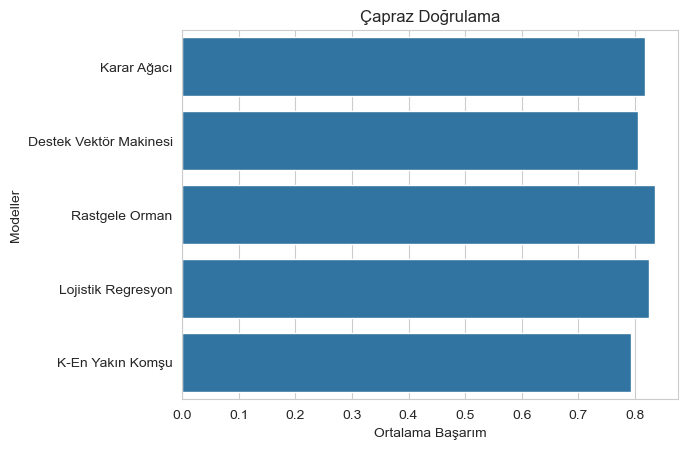

In [511]:
cv_sonuclar = pd.DataFrame({"CaprazDogrulamaOrtalamasi": cv_sonuc, "Modeller": siniflandirici_isim})

g = sns.barplot(x="CaprazDogrulamaOrtalamasi", y="Modeller", data=cv_sonuclar)
g.set_xlabel("Ortalama Başarım")
g.set_title("Çapraz Doğrulama")
plt.show()

### Topluluk Modelleme

* Sınıflandırıcıların verdikleri kararlar çoğunluk oylaması şeklinde değerlendirilir.

In [517]:
oylama = VotingClassifier(estimators=[("dt", siniflandiricilar[0]),
                                       ("rfc", siniflandiricilar[2]),
                                       ("lr", siniflandiricilar[3])],
                           voting="hard", n_jobs=-1)
oylama = oylama.fit(X_egitim, y_egitim)
print("Oylama Sonucu Doğruluk: ", accuracy_score(oylama.predict(X_test),y_test))

Oylama Sonucu Doğruluk:  0.8169491525423729
